In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split

In [2]:
digits = datasets.load_digits()

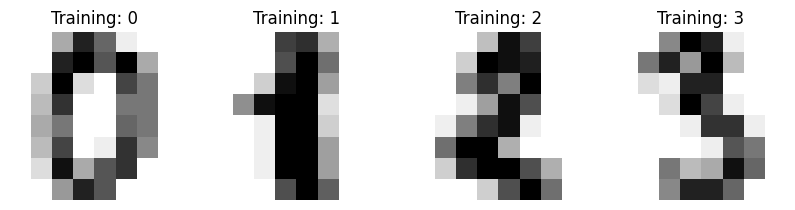

In [13]:
#narysuj za pomocą matplotlib figurę wyświetlającą pierwsze 4 obrazy digits jednym rzędzie z podpisami(rtykietao): trening - (numer obrazu)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [4]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [5]:
n_samples

1797

In [6]:
digits.images.shape

(1797, 8, 8)

In [7]:
data.shape

(1797, 64)

In [39]:
#klasyfikator svm
clf = svm.SVC(gamma=0.001,C=1)

In [8]:
#podział zbioru danych na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, shuffle=False)

In [40]:
clf.fit(X_train, y_train)

SVC(C=1, gamma=0.001)

In [41]:
predicted = clf.predict(X_test)

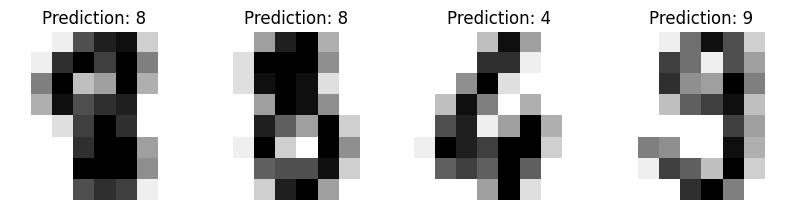

In [42]:
#narysuj za pomocą matplotlib figurę wyświetlającą pierwsze 4 obrazy predykcji dla digits w jednym rzędzie z podpisami(rtykietao): predykcja - (numer obrazu)
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [43]:
#ocena modelu
print(f"raport klasyfikacji:\n{metrics.classification_report(y_test, predicted)}\n")

raport klasyfikacji:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




Text(0.5, 0.98, 'Macierz błędów')

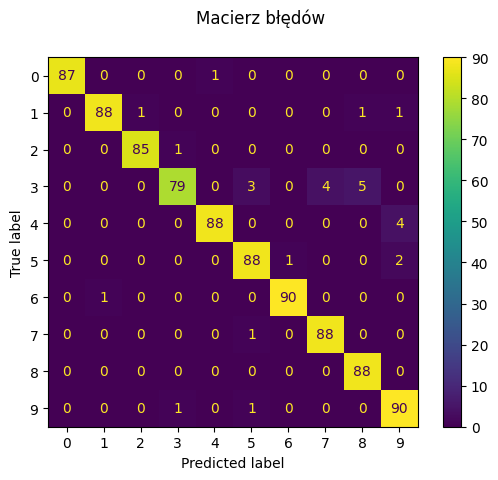

In [44]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Macierz błędów")